# GRUPO 5: Eduard, Abel y Diego

# Importación y carga

In [1]:
#Importamos las librerias

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import csv
import networkx as nx
import seaborn as sns
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
#Cargamos los archivos
df_cloudiness = pd.read_csv("CSV\cloudiness.csv")
df_observations = pd.read_csv("CSV\observations.csv")
df_weather = pd.read_csv("CSV\weather.csv")
df_seasons = pd.read_csv("CSV\seasons.csv")
df_dates = pd.read_csv("CSV\dates.csv")

# Nulos y repetidos

In [3]:
# Contar nulos y repetidos de df_cloudiness
nulos_por_columna = df_cloudiness.isnull().sum()
print("NULOS:")
print(nulos_por_columna)

print("DUPLICADOS:")
cantidades_repetidas = df_cloudiness['cloudiness'].value_counts()
print(cantidades_repetidas)

df_cloudiness.head(6)

NULOS:
cloudiness       0
cloudiness_id    0
dtype: int64
DUPLICADOS:
cloudiness
parcialmente nublado    1
despejado               1
cubierto                1
Name: count, dtype: int64


,cloudiness,cloudiness_id
0,parcialmente nublado,1
1,despejado,2
2,cubierto,3


In [4]:
# Contar nulos y repetidos de df_dates
nulos_por_columna = df_dates.isnull().sum()
print("NULOS:")
print(nulos_por_columna)

print("DUPLICADOS:")
cantidades_repetidas = df_dates['date'].value_counts()
print(cantidades_repetidas)

df_dates.head(6)

NULOS:
date       0
date_id    0
dtype: int64
DUPLICADOS:
date
2016-01-01    1
2061-08-02    1
2061-08-24    1
2061-08-23    1
2061-08-22    1
             ..
2038-10-23    1
2038-10-22    1
2038-10-21    1
2038-10-20    1
2084-06-11    1
Name: count, Length: 25000, dtype: int64


,date,date_id
0,2016-01-01,1
1,2016-01-02,2
2,2016-01-03,3
3,2016-01-04,4
4,2016-01-05,5
5,2016-01-06,6


In [5]:
# Contar nulos y repetidos de df_weather
nulos_por_columna = df_weather.isnull().sum()
print("NULOS:")
print(nulos_por_columna)

print("DUPLICADOS:")
cantidades_repetidas = df_weather['weather'].value_counts()
print(cantidades_repetidas)

df_weather.head(6)

NULOS:
weather       0
weather_id    0
dtype: int64
DUPLICADOS:
weather
storm     1
rain      1
cloudy    1
fog       1
sun       1
Name: count, dtype: int64


,weather,weather_id
0,storm,1
1,rain,2
2,cloudy,3
3,fog,4
4,sun,5


In [6]:
# Contar nulos y repetidos de df_seasons
nulos_por_columna = df_seasons.isnull().sum()
print("NULOS:")
print(nulos_por_columna)

print("DUPLICADOS:")
cantidades_repetidas = df_seasons['estacion_id'].value_counts()
print(cantidades_repetidas)

df_seasons.head(6)

NULOS:
estacion       0
estacion_id    0
dtype: int64
DUPLICADOS:
estacion_id
1    1
2    1
3    1
4    1
Name: count, dtype: int64


,estacion,estacion_id
0,Invierno,1
1,Primavera,2
2,Verano,3
3,Otoño,4


In [7]:
# Contar nulos y repetidos de df_observations
nulos_por_columna = df_observations.isnull().sum()
print("NULOS:")
print(nulos_por_columna)

print("DUPLICADOS:")
cantidades_repetidas = df_observations['date_id'].value_counts()
print(cantidades_repetidas)

df_observations.head(6)

NULOS:
date_id               0
precipitation      2500
temp_max           2500
temp_min           2500
wind               2500
humidity              0
pressure              0
solar_radiation       0
visibility            0
weather_id            0
cloudiness_id         0
estacion_id           0
dtype: int64
DUPLICADOS:
date_id
1        1
16651    1
16673    1
16672    1
16671    1
        ..
8332     1
8331     1
8330     1
8329     1
25000    1
Name: count, Length: 25000, dtype: int64


,date_id,precipitation,temp_max,temp_min,wind,humidity,pressure,solar_radiation,visibility,weather_id,cloudiness_id,estacion_id
0,1,44.599483,24.623334,14.194788,6.343068,72.164838,1047.159266,355.719260,2.554031,1,1,1
1,2,42.005045,5.424691,4.754055,1.965057,61.847605,1015.712275,320.128520,16.960026,2,1,1
2,3,40.041807,4.626002,2.752717,8.278839,70.867155,1032.346048,206.294226,5.264422,1,1,1
3,4,11.733310,33.900703,15.585794,4.369015,82.692741,1018.328973,340.829562,1.650444,2,1,1
4,5,NaN,NaN,NaN,NaN,93.495408,1040.779759,1171.100262,5.274300,3,2,1
5,6,16.171726,4.652273,0.362042,7.379241,52.770392,1005.365595,568.705854,17.483429,1,1,1


# Rellenar nulos (df_observations)

In [8]:
#Rellenar los nulos con la media de la precipitacion en df_observations
df_observations['precipitation'].fillna(df_observations['precipitation'].mean(), inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_12956\684260148.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_observations['precipitation'].fillna(df_observations['precipitation'].mean(), inplace=True)


In [9]:
#Debido a que la media y la mediana son parecidas hemos decidido usar la media ya que la distribución es similar a la normal
df_observations['temp_max'].fillna(df_observations['temp_max'].mean(), inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_12956\1331023783.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_observations['temp_max'].fillna(df_observations['temp_max'].mean(), inplace=True)


In [10]:
#Susituir los valores nulos en temp_min por la mediana ya que la distribución es asimétrica
df_observations['temp_min'].fillna(df_observations['temp_min'].median(), inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_12956\1433955269.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_observations['temp_min'].fillna(df_observations['temp_min'].median(), inplace=True)


In [11]:
#Susituir los valores nulos en wind por el promedio ya que la distribución es similar a la normal
df_observations['wind'].fillna(df_observations['wind'].mean(), inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_12956\462281868.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_observations['wind'].fillna(df_observations['wind'].mean(), inplace=True)


# Graficos

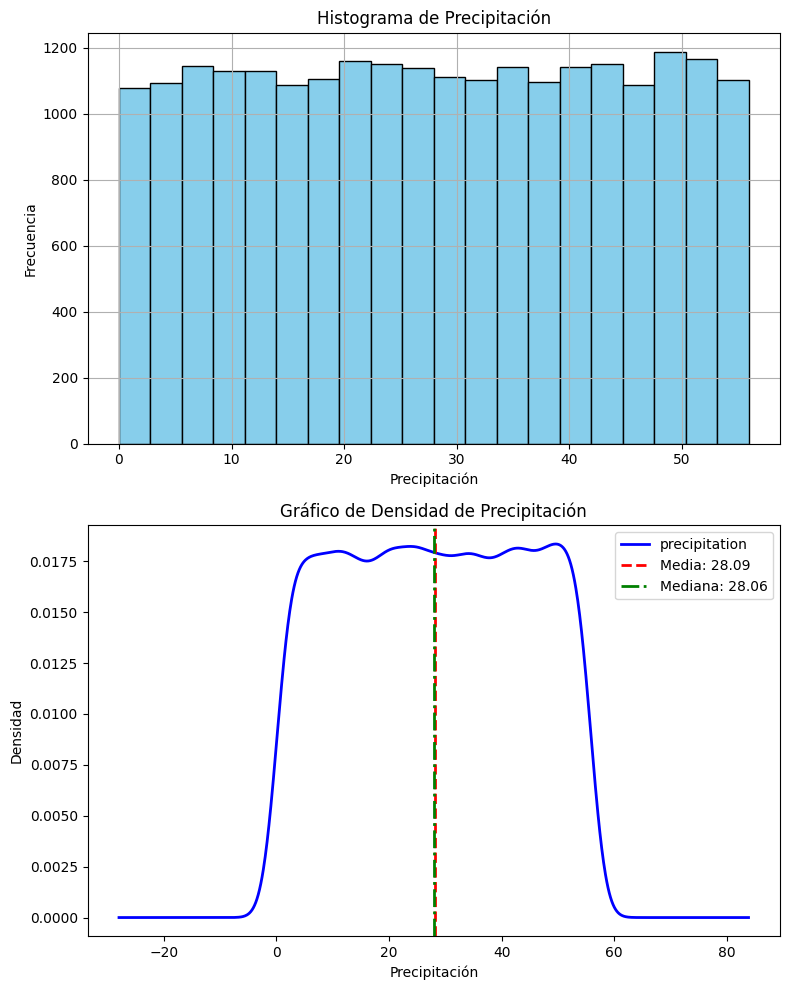

In [ ]:
# Crear la figura y los subplots en una columna (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Subplot 1: Histograma
df_observations['precipitation'].hist(bins=20, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title("Histograma de Precipitación")
axs[0].set_xlabel("Precipitación")
axs[0].set_ylabel("Frecuencia")

# Subplot 2: Gráfico de densidad con media y mediana
df_observations['precipitation'].plot(kind='kde', color='blue', linewidth=2, ax=axs[1])

# Calcular la media y la mediana
media = df_observations['precipitation'].mean()
mediana = df_observations['precipitation'].median()

# Añadir líneas verticales para la media y la mediana en el gráfico de densidad
axs[1].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
axs[1].axvline(mediana, color='green', linestyle='-.', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Configurar el título y etiquetas del segundo subplot
axs[1].set_title("Gráfico de Densidad de Precipitación")
axs[1].set_xlabel("Precipitación")
axs[1].set_ylabel("Densidad")
axs[1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()



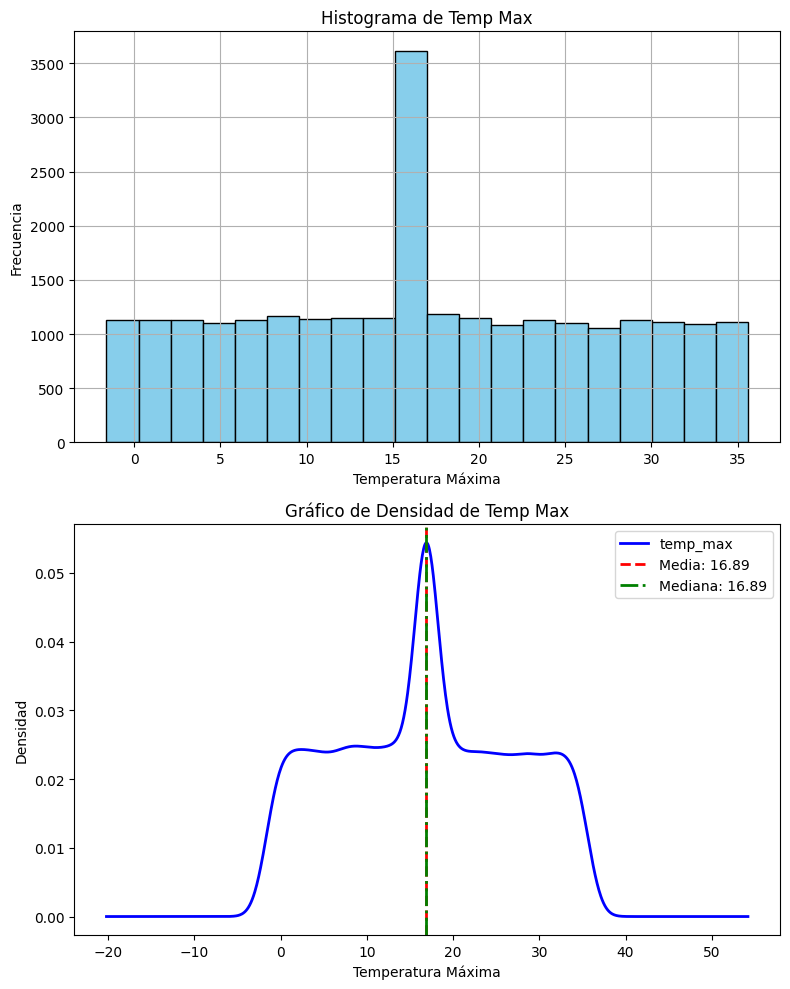

In [30]:
# Crear la figura y los subplots en una columna (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Subplot 1: Histograma de temp_max
df_observations['temp_max'].hist(bins=20, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title("Histograma de Temp Max")
axs[0].set_xlabel("Temperatura Máxima")
axs[0].set_ylabel("Frecuencia")

# Subplot 2: Gráfico de densidad de temp_max con la media y mediana
df_observations['temp_max'].plot(kind='kde', color='blue', linewidth=2, ax=axs[1])

# Calcular la media y la mediana de temp_max
media_temp_max = df_observations['temp_max'].mean()
mediana_temp_max = df_observations['temp_max'].median()

# Añadir líneas verticales para la media y la mediana en el gráfico de densidad
axs[1].axvline(media_temp_max, color='red', linestyle='--', linewidth=2, label=f'Media: {media_temp_max:.2f}')
axs[1].axvline(mediana_temp_max, color='green', linestyle='-.', linewidth=2, label=f'Mediana: {mediana_temp_max:.2f}')

# Configurar el título y etiquetas del segundo subplot
axs[1].set_title("Gráfico de Densidad de Temp Max")
axs[1].set_xlabel("Temperatura Máxima")
axs[1].set_ylabel("Densidad")
axs[1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Media de temp_min: 3.4961641142195017
Mediana de temp_min: 2.735743094830525


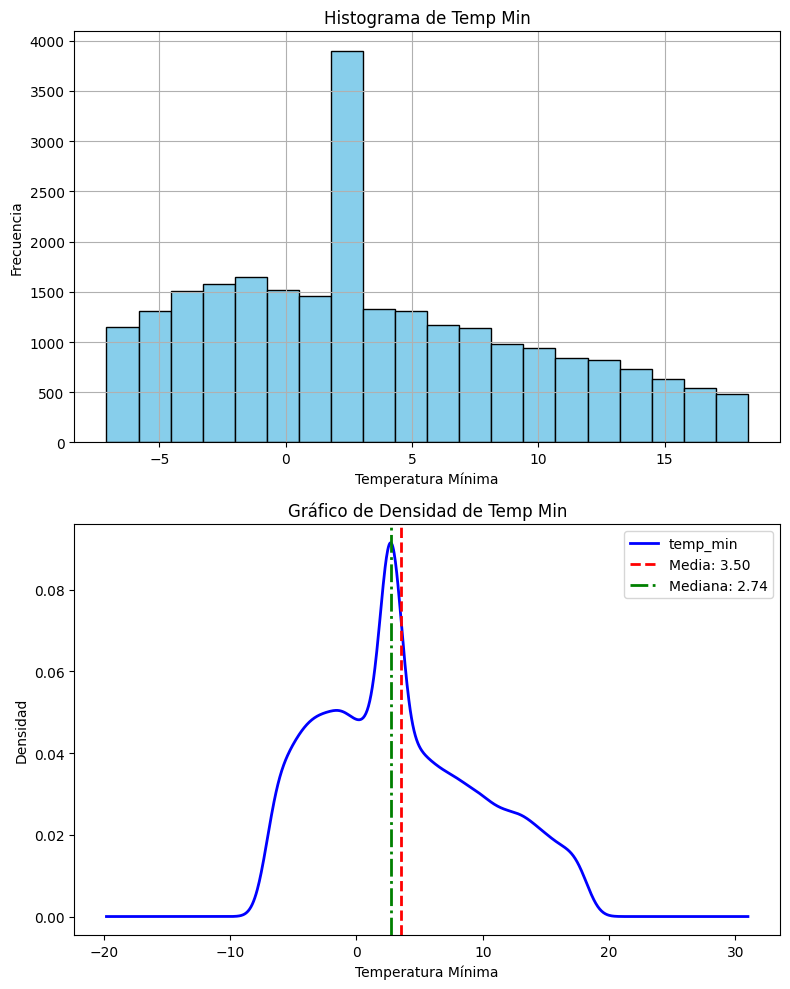

In [31]:
# Crear la figura y los subplots en una columna (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Subplot 1: Histograma de temp_min
df_observations['temp_min'].hist(bins=20, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title("Histograma de Temp Min")
axs[0].set_xlabel("Temperatura Mínima")
axs[0].set_ylabel("Frecuencia")

# Calcular la media y la mediana de temp_min
media_temp_min = df_observations['temp_min'].mean()
mediana_temp_min = df_observations['temp_min'].median()

# Imprimir la media y la mediana
print("Media de temp_min:", media_temp_min)
print("Mediana de temp_min:", mediana_temp_min)

# Subplot 2: Gráfico de densidad de temp_min con la media y la mediana
df_observations['temp_min'].plot(kind='kde', color='blue', linewidth=2, ax=axs[1])

# Añadir líneas verticales para la media y la mediana en el gráfico de densidad
axs[1].axvline(media_temp_min, color='red', linestyle='--', linewidth=2, label=f'Media: {media_temp_min:.2f}')
axs[1].axvline(mediana_temp_min, color='green', linestyle='-.', linewidth=2, label=f'Mediana: {mediana_temp_min:.2f}')

# Configurar el título y etiquetas del segundo subplot
axs[1].set_title("Gráfico de Densidad de Temp Min")
axs[1].set_xlabel("Temperatura Mínima")
axs[1].set_ylabel("Densidad")
axs[1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Media de wind: 4.931800815971482
Mediana de wind: 4.931800815971483


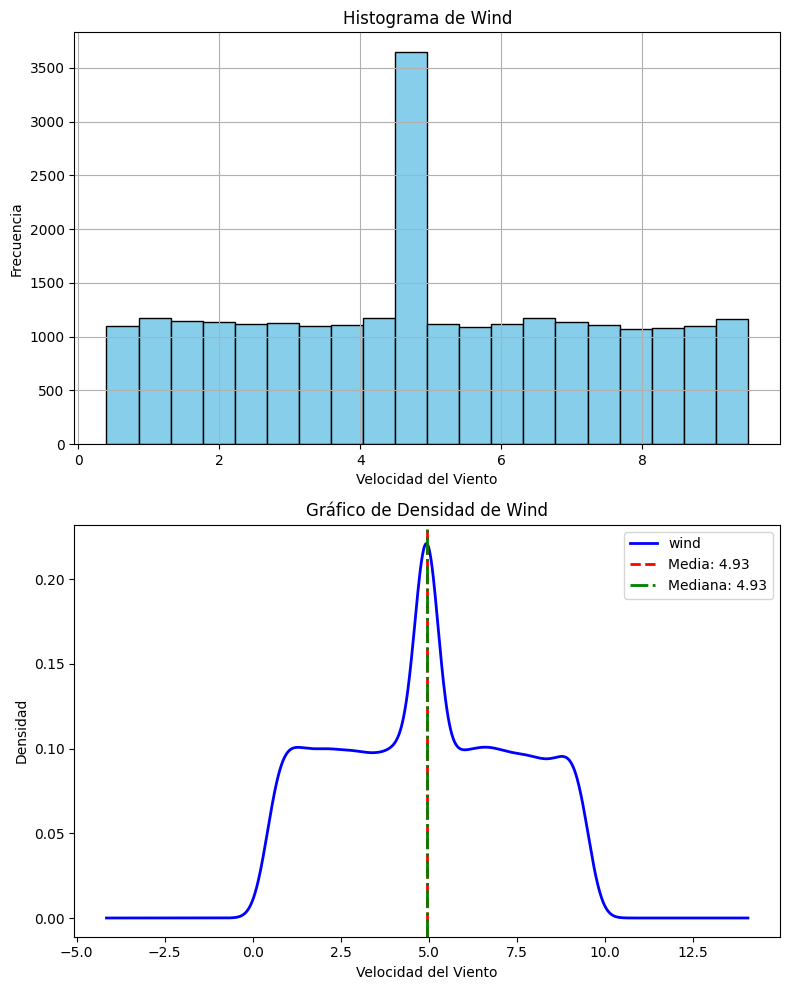

In [32]:
# Crear la figura y los subplots en una columna (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Subplot 1: Histograma de wind
df_observations['wind'].hist(bins=20, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title("Histograma de Wind")
axs[0].set_xlabel("Velocidad del Viento")
axs[0].set_ylabel("Frecuencia")

# Calcular la media y la mediana de wind
media_wind = df_observations['wind'].mean()
mediana_wind = df_observations['wind'].median()

# Imprimir la media y la mediana
print("Media de wind:", media_wind)
print("Mediana de wind:", mediana_wind)

# Subplot 2: Gráfico de densidad de wind con la media y la mediana
df_observations['wind'].plot(kind='kde', color='blue', linewidth=2, ax=axs[1])

# Añadir líneas verticales para la media y la mediana en el gráfico de densidad
axs[1].axvline(media_wind, color='red', linestyle='--', linewidth=2, label=f'Media: {media_wind:.2f}')
axs[1].axvline(mediana_wind, color='green', linestyle='-.', linewidth=2, label=f'Mediana: {mediana_wind:.2f}')

# Configurar el título y etiquetas del segundo subplot
axs[1].set_title("Gráfico de Densidad de Wind")
axs[1].set_xlabel("Velocidad del Viento")
axs[1].set_ylabel("Densidad")
axs[1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Creación tablas

In [12]:
db_path = 'CSV/Prediccion.db'  # Base de datos unificada
conn = sqlite3.connect(db_path)
cursor = conn.cursor()


# Crear la tabla 'dates'
cursor.execute('''
    CREATE TABLE IF NOT EXISTS dates (
        date_id INTEGER PRIMARY KEY,
        date TEXT NOT NULL
    )
''')

# Crear la tabla 'weather'
cursor.execute('''
    CREATE TABLE IF NOT EXISTS weather (
        weather_id INTEGER PRIMARY KEY,
        weather TEXT NOT NULL
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS cloudiness (
        cloudiness_id INTEGER PRIMARY KEY,
        cloudiness TEXT NOT NULL
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS seasons (
        estacion_id INTEGER PRIMARY KEY,
        estacion TEXT NOT NULL
    )
''')

# Crear la tabla 'weather'
cursor.execute('''
    CREATE TABLE IF NOT EXISTS ValoresLimpios (
        date_id INTEGER PRIMARY KEY,      -- Clave primaria
        precipitation REAL,               -- Precipitación
        temp_max REAL,                    -- Temperatura máxima
        temp_min REAL,                    -- Temperatura mínima
        wind REAL,                        -- Viento
        humidity REAL,                    -- Humedad
        pressure REAL,                    -- Presión
        solar_radiation REAL,             -- Radiación solar
        visibility REAL,                  -- Visibilidad
        weather_id INTEGER,               -- Clave foránea que referencia a weather
        cloudiness_id INTEGER,            -- Clave foránea que referencia a cloudiness
        estacion_id INTEGER,            -- Clave foránea que referencia a estación
        FOREIGN KEY (date_id) REFERENCES dates(date_id),
        FOREIGN KEY (weather_id) REFERENCES weather(weather_id),
        FOREIGN KEY (cloudiness_id) REFERENCES cloudiness(cloudiness_id),
        FOREIGN KEY (estacion_id) REFERENCES seasons(estacion_id)
    )
''')




In [13]:
# Insertar datos en la tabla 'cloudiness'
for _, row in df_cloudiness.iterrows():
    cursor.execute('''
        INSERT INTO cloudiness (cloudiness_id, cloudiness)
        VALUES (?, ?)
    ''', (row['cloudiness_id'], row['cloudiness']))

# Insertar datos en la tabla 'weather'
for _, row in df_weather.iterrows():
    cursor.execute('''
        INSERT INTO weather (weather_id, weather)
        VALUES (?, ?)
    ''', (row['weather_id'], row['weather']))

# Insertar datos en la tabla 'dates'
for _, row in df_dates.iterrows():
    cursor.execute('''
        INSERT INTO dates (date_id, date)
        VALUES (?, ?)
    ''', (row['date_id'], row['date']))

# Insertar datos en la tabla 'seasons'
for _, row in df_seasons.iterrows():
    cursor.execute('''
        INSERT INTO seasons (estacion_id, estacion)
        VALUES (?, ?)
    ''', (row['estacion_id'], row['estacion']))

# Insertar datos en la tabla 'ValoresLimpios'
for _, row in df_observations.iterrows():
    cursor.execute('''
        INSERT INTO ValoresLimpios (
            date_id, precipitation, temp_max, temp_min, wind, humidity,
            pressure, solar_radiation, visibility, weather_id, cloudiness_id, estacion_id
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        row['date_id'], row['precipitation'], row['temp_max'], row['temp_min'],
        row['wind'], row['humidity'], row['pressure'], row['solar_radiation'],
        row['visibility'], row['weather_id'], row['cloudiness_id'], row['estacion_id']
    ))

In [14]:
#Guardar cambios en la base de datos
conn.commit()

# Comprobación BBDD

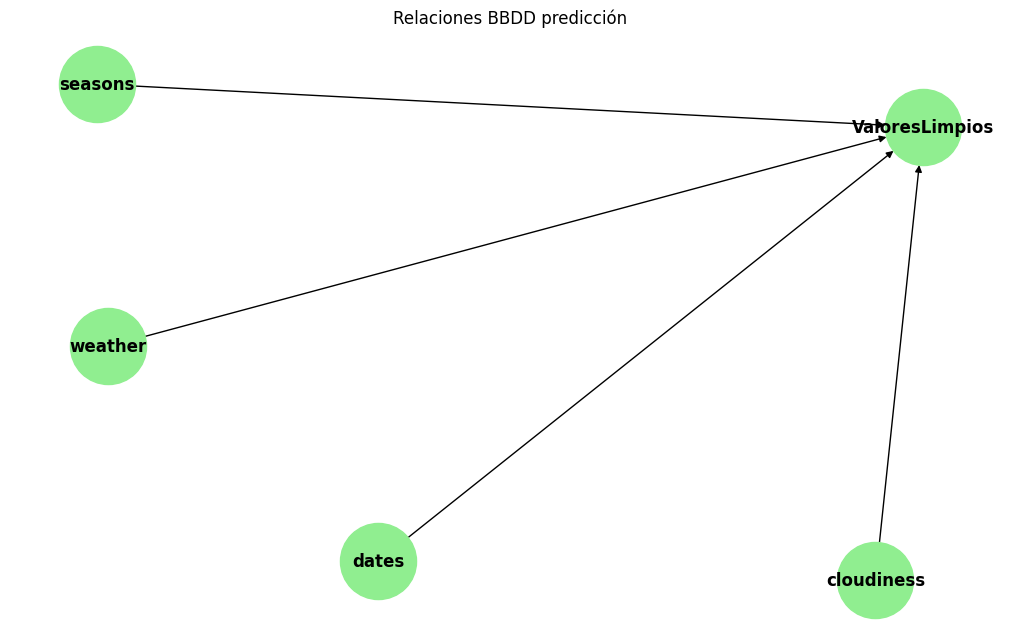

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (tablas)
tables = ['dates', 'weather', 'cloudiness', 'seasons', 'ValoresLimpios']
G.add_nodes_from(tables)

# Agregar relaciones (edges)
relationships = [
    ('weather', 'ValoresLimpios'),       # 'weather' se relaciona con 'ValoresLimpios'
    ('cloudiness', 'ValoresLimpios'),   # 'cloudiness' se relaciona con 'ValoresLimpios'
    ('dates', 'ValoresLimpios'),         # 'dates' se relaciona con 'ValoresLimpios'
    ('seasons', 'ValoresLimpios')         # 'seasons' se relaciona con 'ValoresLimpios'
]

G.add_edges_from(relationships)

# Dibuja el grafo
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Layout para el gráfico
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=12, font_weight='bold', arrows=True)
plt.title("Relaciones BBDD predicción")
plt.show()


# Consultas

In [ ]:
# Conectar a la base de datos SQLite
db_path = 'CSV\Prediccion.db'
conn = sqlite3.connect(db_path)

try:
    # Consulta para obtener la precipitación y la fecha
    query = """
    SELECT d.date, vl.precipitation
    FROM ValoresLimpios vl
    JOIN dates d ON vl.date_id = d.date_id
    ORDER BY d.date
    """
    # Ejecutar la consulta y cargar los resultados en un DataFrame
    ValoresLimpios = pd.read_sql_query(query, conn)

finally:
    # Cerrar la conexión
    conn.close()

# Verificar que los datos se han cargado correctamente
print(ValoresLimpios.head())

# Convertir la columna 'date' a tipo datetime para poder hacer manipulaciones en las fechas
ValoresLimpios['date'] = pd.to_datetime(ValoresLimpios['date'])

# Extraer el año y el mes de la columna 'date'
ValoresLimpios['year'] = ValoresLimpios['date'].dt.year
ValoresLimpios['month'] = ValoresLimpios['date'].dt.month

# Agrupar por año y mes, y obtener la precipitación total para cada mes
monthly_precipitation = ValoresLimpios.groupby(['year', 'month'])['precipitation'].sum().unstack(fill_value=0)

# Crear un gráfico radar por año
years = monthly_precipitation.index

for year in years:
    # Crear el gráfico radar
    categories = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    values = monthly_precipitation.loc[year].values

    # Añadir el primer valor al final para cerrar el gráfico
    values = np.concatenate((values, [values[0]]))

    # Establecer el ángulo para cada categoría
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

    # Añadir el primer ángulo al final para cerrar el gráfico
    angles += angles[:1]

    # Crear la figura
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Dibujar el gráfico radar
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Año {year}')

    # Rellenar el área
    ax.fill(angles, values, alpha=0.25)

    # Configurar los ángulos y etiquetas
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])  # No mostrar el ángulo adicional
    ax.set_xticklabels(categories, fontsize=10)

    # Título del gráfico
    ax.set_title(f'Precipitación Mensual en el Año {year}', size=16)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

weather  cloudy  fog  rain  storm  sun
season                                
Fall       1485   97  2323   2254   29
Spring     1481  109  2372   2357   29
Summer     1477  114  2455   2204   17
Winter     1454  121  2318   2269   35


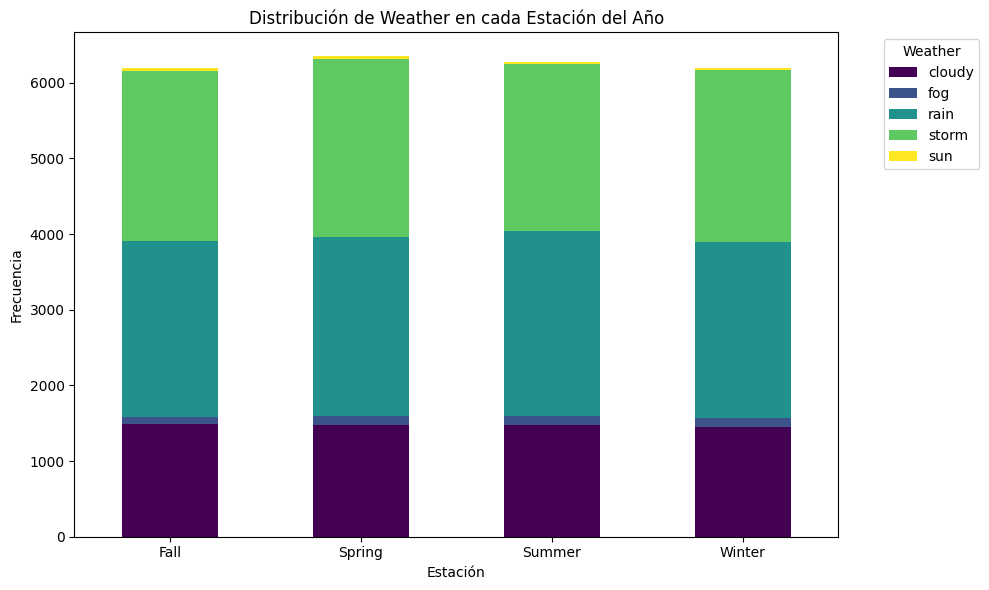

In [24]:

# Convertir la columna 'date' a tipo datetime en el DataFrame de fechas
df_dates['date'] = pd.to_datetime(df_dates['date'])

# Función para asignar estaciones del año en base al mes
def assign_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Asignar la estación a cada fecha
df_dates['season'] = df_dates['date'].apply(assign_season)

# Unir las tablas usando 'date_id' para incluir la estación en las observaciones
merged_df = df_observations.merge(df_dates[['date_id', 'season']], on='date_id', how='left')

# Unir también el DataFrame de weather para obtener los nombres descriptivos
merged_df = merged_df.merge(df_weather[['weather_id', 'weather']], on='weather_id', how='left')

# Crear una tabla de frecuencias para 'weather' en cada estación
weather_season_distribution = merged_df.groupby(['season', 'weather']).size().unstack()

# Mostrar la distribución
print(weather_season_distribution)

#Hacer un gráfico de lo anterior
# Gráfico de barras apiladas para la distribución de clima por estación
weather_season_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

# Configuraciones del gráfico
plt.title('Distribución de Weather en cada Estación del Año')
plt.xlabel('Estación')
plt.ylabel('Frecuencia')
plt.legend(title='Weather', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()  # Ajusta el diseño para evitar recortes

# Mostrar el gráfico
plt.show()

         date  precipitation   humidity      wind   temp_max   temp_min  \
0  2016-01-01      44.599483  72.164838  6.343068  24.623334  14.194788   
1  2016-01-02      42.005045  61.847605  1.965057   5.424691   4.754055   
2  2016-01-03      40.041807  70.867155  8.278839   4.626002   2.752717   
3  2016-01-04      11.733310  82.692741  4.369015  33.900703  15.585794   
4  2016-01-05      28.093321  93.495408  4.931801  16.892393   2.735743   

      pressure  solar_radiation  visibility  
0  1047.159266       355.719260    2.554031  
1  1015.712275       320.128520   16.960026  
2  1032.346048       206.294226    5.264422  
3  1018.328973       340.829562    1.650444  
4  1040.779759      1171.100262    5.274300  


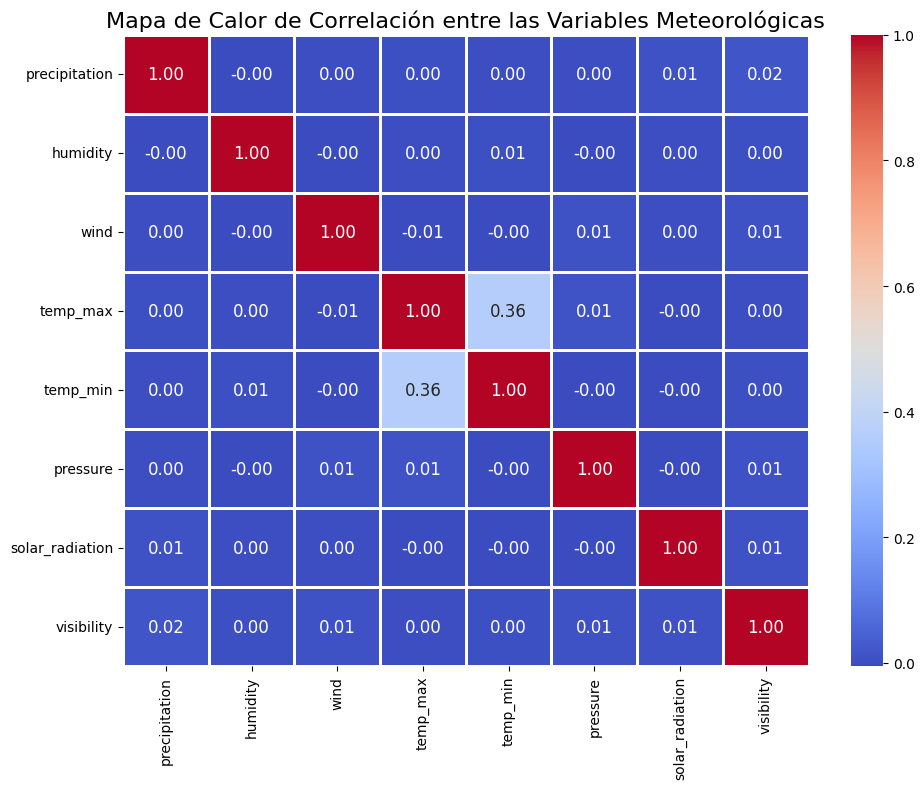

In [27]:

# Conectar a la base de datos SQLite
db_path = 'CSV\Prediccion.db'
conn = sqlite3.connect(db_path)

try:
    # Consulta para obtener todas las variables relevantes
    query = """
    SELECT d.date, vl.precipitation, vl.humidity, vl.wind, vl.temp_max, vl.temp_min, vl.pressure, vl.solar_radiation, vl.visibility
    FROM ValoresLimpios vl
    JOIN dates d ON vl.date_id = d.date_id
    ORDER BY d.date
    """
    # Ejecutar la consulta y cargar los resultados en un DataFrame
    ValoresLimpios = pd.read_sql_query(query, conn)

finally:
    # Cerrar la conexión
    conn.close()

# Verificar que los datos se han cargado correctamente
print(ValoresLimpios.head())

# Convertir la columna 'date' a tipo datetime para poder hacer manipulaciones en las fechas
ValoresLimpios['date'] = pd.to_datetime(ValoresLimpios['date'])

# Asegurarse de que las columnas numéricas sean de tipo float (si es necesario)
ValoresLimpios[['precipitation', 'humidity', 'wind', 'temp_max', 'temp_min', 'pressure', 'solar_radiation', 'visibility']] = ValoresLimpios[['precipitation', 'humidity', 'wind', 'temp_max', 'temp_min', 'pressure', 'solar_radiation', 'visibility']].astype(float)

# Calcular la matriz de correlación
correlation_matrix = ValoresLimpios[['precipitation', 'humidity', 'wind', 'temp_max', 'temp_min', 'pressure', 'solar_radiation', 'visibility']].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=1, fmt='.2f', annot_kws={"size": 12})

# Título del gráfico
plt.title('Mapa de Calor de Correlación entre las Variables Meteorológicas', size=16)

# Mejorar la presentación
plt.tight_layout()
plt.show()

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos SQLite
db_path = 'CSV\Prediccion.db'
conn = sqlite3.connect(db_path)

try:
    # Consulta para obtener los datos de `ValoresLimpios`, `weather`, y `cloudiness`
    query = """
    SELECT d.date,
           vl.precipitation, vl.humidity, vl.wind, vl.temp_max, vl.temp_min, vl.pressure,
           vl.solar_radiation, vl.visibility, w.weather, c.cloudiness, s.estacion
    FROM ValoresLimpios vl
    JOIN dates d ON d.date_id = d.date_id
    JOIN weather w ON w.weather_id = w.weather_id
    JOIN cloudiness c ON c.cloudiness_id = c.cloudiness_id
    JOIN seasons s ON s.estacion_id = s.estacion_id
    ORDER BY d.date
    """
    # Ejecutar la consulta y cargar los resultados en un DataFrame
    ValoresLimpios = pd.read_sql_query(query, conn)

finally:
    # Cerrar la conexión
    conn.close()

# Verificar que los datos se han cargado correctamente
print(ValoresLimpios.head())

# Convertir la columna 'date' a tipo datetime
ValoresLimpios['date'] = pd.to_datetime(ValoresLimpios['date'])

# Asegurarse de que las columnas numéricas sean de tipo float
ValoresLimpios[['precipitation', 'humidity', 'wind', 'temp_max', 'temp_min', 'pressure',
              'solar_radiation', 'visibility']] = ValoresLimpios[['precipitation', 'humidity',
                                                               'wind', 'temp_max', 'temp_min',
                                                               'pressure', 'solar_radiation',
                                                               'visibility']].astype(float)

# Crear variables dummies para las columnas 'weather' y 'cloudiness'
weather_dummies = pd.get_dummies(ValoresLimpios['weather'], prefix='weather').astype(int)
cloudiness_dummies = pd.get_dummies(ValoresLimpios['cloudiness'], prefix='cloudiness').astype(int)
seasons_dummies = pd.get_dummies(ValoresLimpios['estacion'], prefix='seasons').astype(int)

# Unir las dummies al DataFrame original
ValoresLimpios = pd.concat([ValoresLimpios, weather_dummies, cloudiness_dummies, seasons_dummies], axis=1)

# Filtrar solo las columnas numéricas para calcular la correlación
numerical_columns = ValoresLimpios.select_dtypes(include=['float64', 'int64']).columns

# Calcular la correlación solo entre las columnas numéricas
correlation = ValoresLimpios[numerical_columns].corr()

# Configuración del gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True, linewidths=1, fmt='.2f')
plt.title('Mapa de Calor de Correlación entre las Variables con Dummies de Weather y Cloudiness')
plt.tight_layout()
plt.show()

# Modelo

In [34]:
# Conectar a la base de datos SQLite
db_path = 'CSV\Prediccion.db'
conn = sqlite3.connect(db_path)

try:
    # Consulta para obtener las variables necesarias, excluyendo solar_radiation y pressure, e incluyendo cloudiness
    query = """
    SELECT d.date, vl.temp_max, vl.temp_min, vl.humidity, vl.precipitation, vl.wind, w.weather, c.cloudiness, s.estacion
    FROM ValoresLimpios vl
    JOIN dates d ON vl.date_id = d.date_id
    JOIN weather w ON vl.weather_id = w.weather_id
    JOIN cloudiness c ON vl.cloudiness_id = c.cloudiness_id
    JOIN seasons s ON vl.estacion_id = s.estacion_id
    """
    # Ejecutar la consulta y cargar los resultados en un DataFrame
    ValoresLimpios = pd.read_sql_query(query, conn)

finally:
    # Cerrar la conexión
    conn.close()

# Verificar que los datos se han cargado correctamente
print(ValoresLimpios.head())

# Convertir la columna 'date' a tipo datetime
ValoresLimpios['date'] = pd.to_datetime(ValoresLimpios['date'])

# Crear variables dummies para 'weather' y 'cloudiness'
ValoresLimpios = pd.get_dummies(ValoresLimpios, columns=['weather', 'cloudiness', 'estacion'], drop_first=True)
print(ValoresLimpios.head())

# Separar las características (X) y el objetivo (y) - todas las columnas 'weather_' son el objetivo
X = ValoresLimpios.drop(['date'], axis=1).drop(columns=[col for col in ValoresLimpios if 'weather_' in col])
y = ValoresLimpios[[col for col in ValoresLimpios.columns if 'weather_' in col]]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar y entrenar el modelo de regresión lineal para cada variable dummy de 'weather'
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
for i, col in enumerate(y.columns):
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    r2 = r2_score(y_test[col], y_pred[:, i])
    print(f"Resultados para la categoría '{col}':")
    print(f" - Error cuadrático medio (MSE): {mse:.4f}")
    print(f" - Coeficiente de determinación (R²): {r2:.4f}")
    print("\n")

         date   temp_max   temp_min   humidity  precipitation      wind  \
0  2016-01-01  24.623334  14.194788  72.164838      44.599483  6.343068   
1  2016-01-02   5.424691   4.754055  61.847605      42.005045  1.965057   
2  2016-01-03   4.626002   2.752717  70.867155      40.041807  8.278839   
3  2016-01-04  33.900703  15.585794  82.692741      11.733310  4.369015   
4  2016-01-05  16.892393   2.735743  93.495408      28.093321  4.931801   

  weather            cloudiness  estacion  
0   storm  parcialmente nublado  Invierno  
1    rain  parcialmente nublado  Invierno  
2   storm  parcialmente nublado  Invierno  
3    rain  parcialmente nublado  Invierno  
4  cloudy             despejado  Invierno  
        date   temp_max   temp_min   humidity  precipitation      wind  \
0 2016-01-01  24.623334  14.194788  72.164838      44.599483  6.343068   
1 2016-01-02   5.424691   4.754055  61.847605      42.005045  1.965057   
2 2016-01-03   4.626002   2.752717  70.867155      40.041807  8

**Error Cuadrático Medio (MSE):** mide la **magnitud del error entre las predicciones y los valores reales** (**valores menores indican mejor ajuste**).

Para `weather_sun`, el MSE es muy bajo (0.0034), lo que sugiere que las predicciones son bastante precisas en promedio para esta categoría.
Para `weather_rain` y `weather_storm`, el MSE es más alto (0.1111 y 0.1054, respectivamente), lo cual indica una mayor dificultad para predecir estos tipos de clima.


---


**Coeficiente de Determinación (R²):** indica qué tan bien el modelo explica **la variabilidad** en los datos **(valores cercanos a 1 indican mejor ajuste)**.

El valor positivo de R² en `weather_rain` (0.5329) y `weather_storm` (0.5303) muestra que el modelo tiene una capacidad razonable para predecir estas categorías de clima.
Sin embargo, para `weather_fog` (0.0382) y `weather_sun` (-0.0218), los valores bajos o negativos de
𝑅
2
R
2
  sugieren que el modelo tiene dificultad para capturar la variabilidad en estos tipos de clima.


---


En resumen, el modelo es más efectivo para predecir weather_rain y weather_storm, mientras que tiene menos precisión para weather_fog y weather_sun.